
Model: "Mymodel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 128)               10496     
                                                                 
 layer2 (Dense)              (None, 128)               16512     
                                                                 
 layer3 (Dense)              (None, 26)                3354      
                                                                 
Total params: 30362 (118.60 KB)
Trainable params: 30362 (118.60 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
w1 shape:(81, 128) , b1 shape: (128,)
w2 shape:(128, 128) , b2 shape: (128,)
w3 shape:(128, 26) , b3 shape: (26,)
Epoch 1/100


2220/2220 [==============================] - 3s 1ms/step - loss: 0.9382 - accuracy: 0.7172
Epoch 2/100
2220/2220 [==============================] - 2s 1ms/s

2220/2220 [==============================] - 2s 1ms/step - loss: 0.0822 - accuracy: 0.9663
Epoch 63/100
2220/2220 [==============================] - 2s 973us/step - loss: 0.0805 - accuracy: 0.9680
Epoch 64/100
2220/2220 [==============================] - 2s 959us/step - loss: 0.0783 - accuracy: 0.9683
Epoch 65/100
2220/2220 [==============================] - 2s 1ms/step - loss: 0.0781 - accuracy: 0.9686
Epoch 66/100
2220/2220 [==============================] - 2s 958us/step - loss: 0.0750 - accuracy: 0.9697
Epoch 67/100
2220/2220 [==============================] - 2s 937us/step - loss: 0.0749 - accuracy: 0.9700
Epoch 68/100
2220/2220 [==============================] - 2s 947us/step - loss: 0.0732 - accuracy: 0.9705
Epoch 69/100
2220/2220 [==============================] - 2s 947us/step - loss: 0.0711 - accuracy: 0.9716
Epoch 70/100
2220/2220 [==============================] - 2s 936us/step - loss: 0.0715 - accuracy: 0.9709
Epoch 71/100
2220/2220 [==============================] - 2s 94

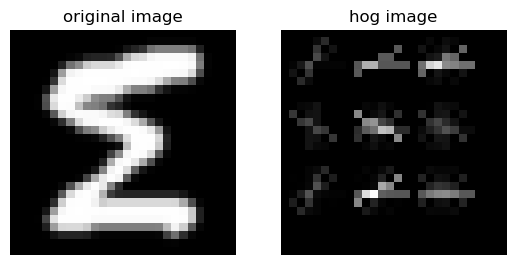

In [2]:
from FinalModel import model

In [3]:
import customtkinter
import tkinter as tk
from tkinter import filedialog
import numpy as np

from PIL import Image
from skimage import feature,io,exposure
import tensorflow as tf


In [4]:
def MakePrediction(img):
    prediction=model.predict([img])
    prediction_p=tf.nn.softmax(prediction)
    
    return np.argmax(prediction_p)

In [6]:


def determine_letter(prediction):
    letters={i: chr(ord('A') + i) for i in range(26)}
    
    return letters[prediction]
    

In [7]:
def extract_feature(image):
    hog_image,_=feature.hog(image,visualize=True)
    return hog_image

In [98]:
def upload_file():
    file_path = filedialog.askopenfilename()
    # Process the uploaded file path or perform any desired actions
    if file_path:
        image=Image.open(file_path)
        
        image_array=np.asarray(image)
        
        
        image_array_2d= image_array[:,:,0].reshape((28,28))
        
        
        hog_image=extract_feature(image_array_2d)
        
        hog_image=hog_image.reshape((1,81))
        
        
        
        prediction=MakePrediction(hog_image)
        
        
        predicted_letter=determine_letter(prediction)
        
        top_window=customtkinter.CTkToplevel(app)
        
        top_window.grid_columnconfigure(0,weight=1)
        top_window.grid_rowconfigure(0,weight=1)
        
        top_window.title("The Pridiction Of a Model")
        
        
        screen_width=app.winfo_screenwidth()
        screen_height=app.winfo_screenheight()

        w=350
        h=200

        a=(screen_width/2)-(w/2)
        b=(screen_height/2)-(h/2)


        top_window.geometry("%dx%d+%d+%d" %(w,h,a,b))
        
        label2=customtkinter.CTkLabel(top_window,text=f"The Character in image is {predicted_letter}",text_color="blue",fg_color="transparent",font=("Arial",22))
        label2.grid(row=0,column=0,padx=10,pady=10)
                
        top_window.attributes('-topmost', 'true')

In [117]:
app=customtkinter.CTk()

In [118]:
customtkinter.set_appearance_mode("dark")
customtkinter.set_default_color_theme("dark-blue")

In [119]:
screen_width=app.winfo_screenwidth()
screen_height=app.winfo_screenheight()

w=500
h=500

a=(screen_width/2)-(w/2)
b=(screen_height/2)-(h/2)


app.geometry("%dx%d+%d+%d" %(w,h,a,b))

In [120]:
app.title("OCR for HandWritten character")


''

In [121]:
app.grid_columnconfigure(0,weight=1)
app.grid_rowconfigure(0,weight=1)



In [122]:
frame1=customtkinter.CTkFrame(app,width=300,height=300,fg_color="transparent")
frame1.grid(row=0,column=0,padx=10,pady=10)

In [123]:
label1=customtkinter.CTkLabel(frame1,text="Please choose a 28x28 image",fg_color="transparent",text_color="blue",font=("Arial",20))
label1.grid(row=0,column=0,padx=10,pady=10)

In [124]:
button1=customtkinter.CTkButton(frame1,text="Choose image",command=upload_file,corner_radius=15,fg_color="blue")
button1.grid(row=1,column=0,padx=10,pady=10)

In [125]:
app.mainloop()


1/1 [==============================] - 0s 17ms/step
